# Machine Learning Engineer Nanodegree

### Capstone Project

Deepika Kothapalli

28th June 2018

## Project : Using Supervised learning to determine whether a customer will subscribe to a Bank Campaign or not

## Getting started :

In this project I will take the data of the customers of the bank and determine whether they will subscribe for the campaign or not. I will classify the data into subscribed and not subscribed. My target variable is either 'yes' or 'no'. If the customer subscribes for the campaign output will be 'yes' otherwise 'no'. Here I will employ several supervised learning algorithms for classification and pick the one which provides good accuracy.

## Exploring data :

Here Iam reading the data from the csv file using read_csv() and storing it into a data frame. Iam printing the first five records of the data to see how the data is.

In [12]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 

#good display for notebook
%matplotlib inline

# Load the bank dataset
data = pd.read_csv("bank.csv",sep=';')

#Display the first five records
display(data.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Implementation : Exploring data

- The total number of records, `'records'`
- The number of customers subscribed, `'subscribe'`.
- The number of customers does not subscribe, `'unsubscribe'`.
- The percentage of customers subscribed, `'subs_percen'`.

In [13]:
records = data.count()
records=records['y']


sub = data[(data['y']=='yes')].count()
subscribe = sub['y']

z = data[(data['y']=='no')].count()
unsubscribe=z['y']

subs_percen = (subscribe*100)/(records*1.0)

# Print the results
print("Total number of records: {}".format(records))
print("The number of customers subscribed: {}".format(subscribe))
print("The number of customers does not subscribe: {}".format(unsubscribe))
print("The percentage of customers subscribed: {}%".format(subs_percen))

Total number of records: 4521
The number of customers subscribed: 521
The number of customers does not subscribe: 4000
The percentage of customers subscribed: 11.5239991152%


## Features Description

- age : age of the customer.
- job : present occupation of the customer ('admin.','bluecollar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : Marital status of the customer ('single','married','divorced','unknown')
- default : whether the customer has a credit in default ('yes','no','unknown')
- balance : current balance in the account 
- housing : whether the customer has housing loan ('yes','no','unknown')
- loan :    whether the customer has personal loan ('yes','no','unknown')
- contact : contact communication type ('cellular','telephone')
- day : days before which the customer is contacted 
- month : last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration : last contact duration, in seconds
- campaign : number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays : number of days that passed by after the client was last contacted from a previous campaign
- previous : number of contacts performed before this campaign and for this client
- poutcome : outcome of the previous contact ('success','failure','unknown')

## Data Visualization 

AxesSubplot(0.125,0.670278;0.215278x0.209722)
AxesSubplot(0.404861,0.670278;0.215278x0.209722)
AxesSubplot(0.684722,0.670278;0.215278x0.209722)
AxesSubplot(0.125,0.397639;0.215278x0.209722)
AxesSubplot(0.404861,0.397639;0.215278x0.209722)
AxesSubplot(0.684722,0.397639;0.215278x0.209722)
AxesSubplot(0.125,0.125;0.215278x0.209722)
AxesSubplot(0.404861,0.125;0.215278x0.209722)
AxesSubplot(0.684722,0.125;0.215278x0.209722)


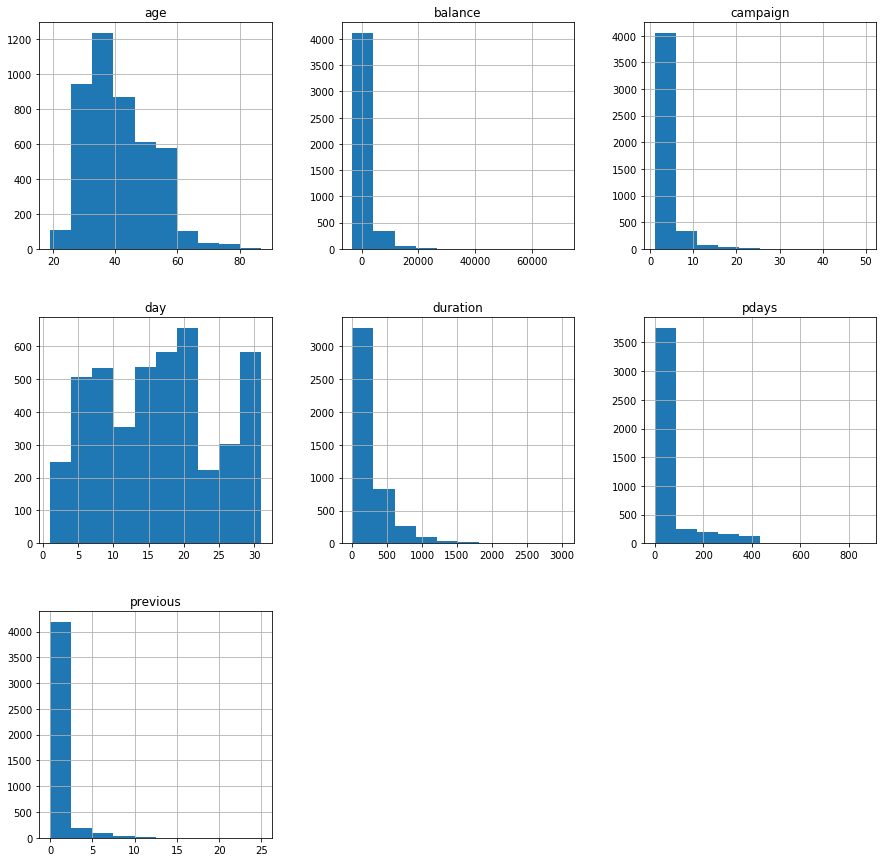

In [14]:
# Splitting the data into features and target label
import matplotlib.pyplot as plt
target = data['y']
features_raw = data.drop('y', axis = 1)

# To determine the distribution of features
histogram=features_raw.hist(figsize=(15,15))
for x in histogram.flatten():
    print x

Text(0.5,1,u'Heatmap of Correlation Matrix')

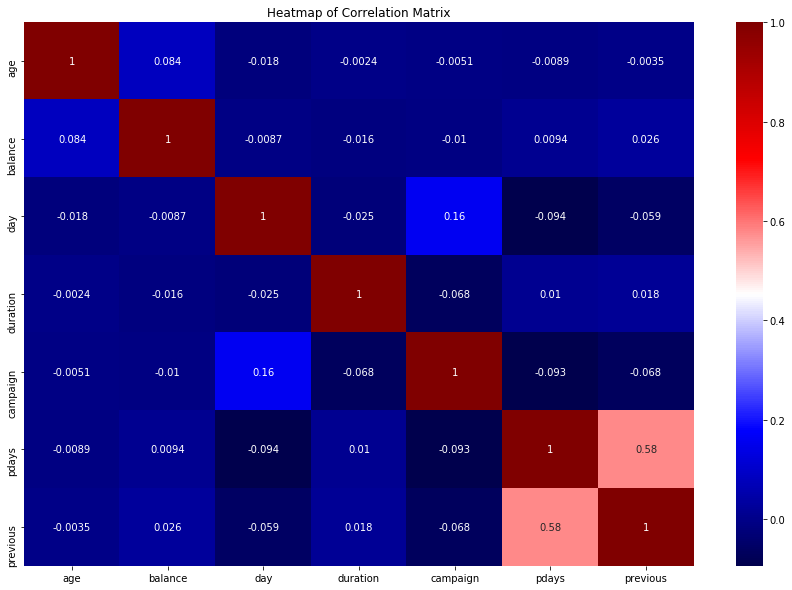

In [15]:
import seaborn as sns

fig = plt.figure(figsize=(15,10))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

## Normalizing the data

From the distributions above we can clearly say that there is skewness in the data.  To remove the skewness we need to normalize the data. First I will apply logarithmic transformation to reduce the range of values caused by outliers and then I will apply min_max_scaler to scale down the values between 0 and 1 for numeric data.

In [16]:
# Log-transform the skewed features
features_raw['pdays']=features_raw['pdays'].map(lambda x:0 if x==-1 else x)
features_raw['balance']=features_raw['balance'].map(lambda x:0 if (x < 0) else x)
features_raw['balance']=features_raw['balance'].fillna(np.mean(features_raw['balance']))
skewed = ['age','balance','day','duration','campaign','pdays','previous']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
#features_raw.head()
features_log_transformed.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3.433987,unemployed,married,primary,no,7.488853,no,no,cellular,2.995732,oct,4.382027,0.693147,0.000000,0.000000,unknown
1,3.526361,services,married,secondary,no,8.474286,yes,yes,cellular,2.484907,may,5.398163,0.693147,5.828946,1.609438,failure
2,3.583519,management,single,tertiary,no,7.208600,yes,no,cellular,2.833213,apr,5.225747,0.693147,5.802118,0.693147,failure
3,3.433987,management,married,tertiary,no,7.297768,yes,yes,unknown,1.386294,jun,5.298317,1.609438,0.000000,0.000000,unknown
4,4.094345,blue-collar,married,secondary,no,0.000000,yes,no,unknown,1.791759,may,5.424950,0.693147,0.000000,0.000000,unknown


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age','balance','day','duration','pdays','campaign','previous']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.295798,unemployed,married,primary,no,0.670258,no,no,cellular,0.830482,oct,0.432841,0.000000,0.000000,0.000000,unknown
1,0.358144,services,married,secondary,no,0.758455,yes,yes,cellular,0.646241,may,0.591474,0.000000,0.860896,0.493981,failure
2,0.396723,management,single,tertiary,no,0.645175,yes,no,cellular,0.771866,apr,0.564558,0.000000,0.856934,0.212746,failure
3,0.295798,management,married,tertiary,no,0.653156,yes,yes,unknown,0.250000,jun,0.575887,0.282921,0.000000,0.000000,unknown
4,0.741502,blue-collar,married,secondary,no,0.000000,yes,no,unknown,0.396241,may,0.595656,0.000000,0.000000,0.000000,unknown


## One hot encoding 

Some of the data is categorial.  Learning algorithms work well with numerical data than categorial data.  Hence we need to convert the categorial data to numeric data. One of the best techniques to convert categorical data to numeric data is one hot encoding. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature.

In [18]:
#Converting the categorial features to numerical by creating dummies using one hot encoding
features_final = pd.get_dummies(features_log_minmax_transform)

#Converting the categorical target variable subscribed - 0 and unsubscribed - 1
target = target.map(lambda x : 0 if x == 'no' else 1)
features_final.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.295798,0.670258,0.830482,0.432841,0.000000,0.000000,0.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.358144,0.758455,0.646241,0.591474,0.000000,0.860896,0.493981,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0.396723,0.645175,0.771866,0.564558,0.000000,0.856934,0.212746,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.295798,0.653156,0.250000,0.575887,0.282921,0.000000,0.000000,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.741502,0.000000,0.396241,0.595656,0.000000,0.000000,0.000000,0,1,0,...,0,0,1,0,0,0,0,0,0,1


## Feature Selection 

In [19]:
# storing the associated ranks of the features.
from sklearn.preprocessing import MinMaxScaler
ranks = {}
# Creating a function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    min_max = MinMaxScaler()
    ranks = min_max.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda m: round(m,4), ranks)
    return dict(zip(names, ranks))

In [20]:
# implementing feature selection using RFE
f= features_final
v = target
# import RFE from sklearn.feature_selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# using a linear regressor
lr = LogisticRegression()

# stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1,verbose=3,step=1)

rfe.fit(f,v)

#print(rfe.ranking_)

ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), data.columns, order=-1)


Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 fe

In [21]:
features_final.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.295798,0.670258,0.830482,0.432841,0.000000,0.000000,0.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.358144,0.758455,0.646241,0.591474,0.000000,0.860896,0.493981,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0.396723,0.645175,0.771866,0.564558,0.000000,0.856934,0.212746,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.295798,0.653156,0.250000,0.575887,0.282921,0.000000,0.000000,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.741502,0.000000,0.396241,0.595656,0.000000,0.000000,0.000000,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [22]:
display(features_final.columns)

Index([u'age', u'balance', u'day', u'duration', u'campaign', u'pdays',
       u'previous', u'job_admin.', u'job_blue-collar', u'job_entrepreneur',
       u'job_housemaid', u'job_management', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'default_no', u'default_yes', u'housing_no',
       u'housing_yes', u'loan_no', u'loan_yes', u'contact_cellular',
       u'contact_telephone', u'contact_unknown', u'month_apr', u'month_aug',
       u'month_dec', u'month_feb', u'month_jan', u'month_jul', u'month_jun',
       u'month_mar', u'month_may', u'month_nov', u'month_oct', u'month_sep',
       u'poutcome_failure', u'poutcome_other', u'poutcome_success',
       u'poutcome_unknown'],
      dtype='object')

In [23]:
rfe.ranking_

array([26, 24, 36,  1, 15, 12, 23, 51, 31, 45, 42, 48, 22, 47, 46, 34, 44,
       29, 32, 28, 25, 27, 39, 40, 41, 30,  9, 10,  4,  3,  8,  7, 37, 38,
       13, 43, 33, 49, 50, 16, 18, 35,  5, 19, 17,  6, 14, 20, 21,  2, 11])

## Removing irrelevant attributes from the data set

In [24]:
# drop the columns which are found irrelevant
features_final_removed = ['day','previous','contact_cellular','contact_telephone','contact_unknown','month_jan','month_feb','month_mar','month_apr','month_may','month_jun','month_jul','month_aug','month_sep','month_oct','month_nov','month_dec']
for i in features_final_removed:
    features_final = features_final.drop(i,axis=1)
features_final.head(5)

,age,balance,duration,campaign,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.295798,0.670258,0.432841,0.000000,0.000000,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,0.358144,0.758455,0.591474,0.000000,0.860896,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,0
2,0.396723,0.645175,0.564558,0.000000,0.856934,0,0,0,0,1,...,1,0,0,1,1,0,1,0,0,0
3,0.295798,0.653156,0.575887,0.282921,0.000000,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
4,0.741502,0.000000,0.595656,0.000000,0.000000,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


## Data shuffling and splitting

Total data is splitted into 80% of the training data and 20% of the testing data. 

In [25]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final,  target,  test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3616 samples.
Testing set has 905 samples.


## Evaluation metrics

- Accuracy and f-beta score are used as evaluation metrics.

** Accuracy :** It determines the proportion of correct predicts among all the predictions
        
        Accuracy= TP+TN/(TP+TN+FP+FN)
        
Where True positives and True Negatives are the correct predictions. False positives and False negatives are wrong predictions.

**Precision :** It determines among all the customers that are predicted as subscribed to the campaign who are actually subscribed.

        Precision=TP/(TP+FP)

**Recall :**  Recall determines the proportion of subscribed customers correctly predicted among the actual subscribed customers.
        Recall=TP/(TP+FN)
            
**F-Beta score : ** F-beta score is the weighted harmonic mean of precision and recall. 

    β F-beta=(1+ β2) *precision *recall/( β2*precision+recall)


In [68]:
def accuracy_scorer(y_true,y_pred):
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_true,y_pred)
    return score

In [69]:
def fbeta_scorer(y_true,y_pred):
    from sklearn.metrics import fbeta_score
    score = fbeta_score(y_true,y_pred,beta=0.1)
    return score

## Benchmark model

### Logistic regression

In [70]:
from sklearn import linear_model
l =  linear_model.LogisticRegression(random_state=20)
l_fit = l.fit(X_train,y_train)
l_pred = l_fit.predict(X_test)
score=accuracy_scorer(y_test,l_pred)
f_score = fbeta_scorer(y_test,l_pred)

print "Accuracy score for logistic regression : {}".format(score)
print "f-score for logistic regression :{}".format(f_score)

Accuracy score for logistic regression : 0.892817679558
f-score for logistic regression :0.663871260199


## Application of different supervised learning models

### Decision tree classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = DecisionTreeClassifier(random_state=100)
dec_fit = dec_clf.fit(X_train,y_train)
dec_pred = dec_fit.predict(X_test)
dec_score = accuracy_scorer(y_test,dec_pred)
dec_f_score = fbeta_scorer(y_test,dec_pred)

print "Accuracy score for DecisionTreeClassifier : {}".format(dec_score)
print "f-score for DecisionTreeClassifier :{}".format(dec_f_score)


Accuracy score for DecisionTreeClassifier : 0.850828729282
f-score for DecisionTreeClassifier :0.392341842397


### Ada Boost classifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(random_state=20)
ada_fit=ada_clf.fit(X_train,y_train)
ada_pred=ada_fit.predict(X_test)
ada_score=accuracy_scorer(y_test,ada_pred)
ada_f_score=fbeta_scorer(y_test,ada_pred)

print "Accuracy score for AdaBoostClassifier : {}".format(ada_score)
print "f-score for AdaBoostClassifier:{}".format(ada_f_score)

Accuracy score for AdaBoostClassifier : 0.893922651934
f-score for AdaBoostClassifier:0.605031948882


### Gradient Boost Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(random_state=20)
gbc_fit = gbc_clf.fit(X_train,y_train)
gbc_pred = gbc_clf.predict(X_test)

gbc_score = accuracy_scorer(y_test,gbc_pred)
gbc_f_score = fbeta_scorer(y_test,gbc_pred)

print "Accuracy score for GradientBoostingClassifier : {}".format(gbc_score)
print "f-score for GradientBoostingClassifier:{}".format(gbc_f_score)

Accuracy score for GradientBoostingClassifier : 0.891712707182
f-score for GradientBoostingClassifier:0.593955142232


## Among the three models 

Among the three models DecisionTreeClassifier, AdaBoostClassifier, GradientBoostClasssifier AdaBoostClassifier has good accuracy and f-score after the benchmark model logistic regression. Hence, Iam optimizing this model to see if there is any further improvement when compared to logistic regression i.e., the benchmark model

### Grid Search

In [99]:
#applying GridSearch
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score

ada_clf = AdaBoostClassifier(random_state=0)

#hyperparameters to be tuned.
parameters = { 'n_estimators': [70,80, 90, 100, 110], 'learning_rate' :[.60,.70, .80, .90, .95] }


scorer = make_scorer(fbeta_score,beta=0.1)

grid_obj = GridSearchCV(estimator=ada_clf,param_grid=parameters,scoring=scorer)


grid_fit =grid_obj.fit(X_train, y_train)


best_clf = grid_fit.best_estimator_

best_pred = best_clf.predict(X_test)

best_score_ada = accuracy_scorer(y_test,best_pred)
best_f_score_ada = fbeta_scorer(y_test,best_pred)

print best_score_ada
print best_f_score_ada

0.895027624309
0.616195230172


## Best Model

Eventhough the accuracy score and f-score of AdaBoostClassifier has increased slightly after optimizing using GridSearch. But it is not high when compared to logistic regression. Hence, I pick logistic regression as the best model for this data.

## Applying GridSearch on the best model

In [100]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(random_state=20)

parameters = {'C':[0.0001,0.001,0.01,0.1]}


scorer = make_scorer(fbeta_score,beta=0.5)

grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer)

grid_fit =grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

best_pred = best_clf.predict(X_test)

best_score_logistic = accuracy_scorer(y_test,best_pred)
best_f_score_logistic = fbeta_scorer(y_test,best_pred)

print "The final accuracy of the best model is {}".format(best_score_logistic)
print "The final f-score of the best model is {}".format(best_f_score_logistic)


The final accuracy of the best model is 0.889502762431
The final f-score of the best model is 0.868386243386


## Accuracy and F-score Visualization before optimization

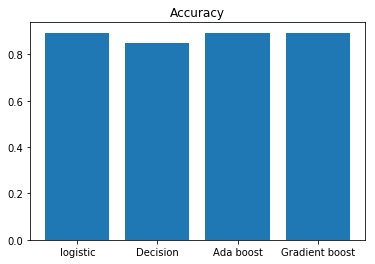

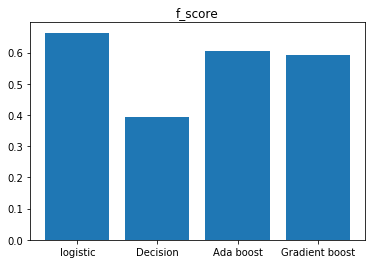

In [101]:
import matplotlib.pyplot as plt
x = []
x.append(score)
x.append(dec_score)
x.append(ada_score)
x.append(gbc_score)
x=np.array(x)

y = np.arange(4)
plt.title('Accuracy')
plt.bar(y,x )
plt.xticks(y, ('logistic', 'Decision', 'Ada boost', 'Gradient boost'))
plt.show()

x = []
x.append(f_score)
x.append(dec_f_score)
x.append(ada_f_score)
x.append(gbc_f_score)
x=np.array(x)
y = np.arange(4)
plt.title('f_score')
plt.bar(y,x )
plt.xticks(y, ('logistic', 'Decision', 'Ada boost', 'Gradient boost'))
plt.show()


## Accuracy and F-score Visualization after optimization

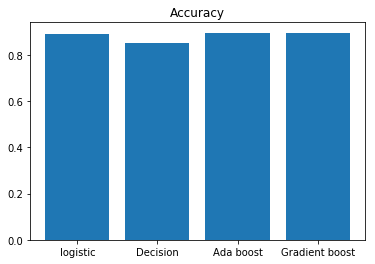

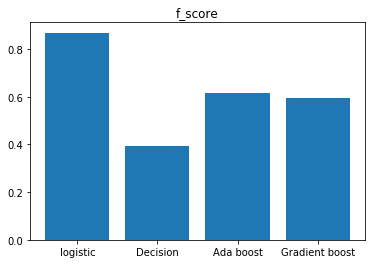

In [102]:
x = []
x.append(best_score_logistic)
x.append(dec_score)
x.append(best_score_ada)
x.append(gbc_score)
x=np.array(x)

y = np.arange(4)
plt.title('Accuracy')
plt.bar(y,x )
plt.xticks(y, ('logistic', 'Decision', 'Ada boost', 'Gradient boost'))
plt.show()

x = []
x.append(best_f_score_logistic)
x.append(dec_f_score)
x.append(best_f_score_ada)
x.append(gbc_f_score)
x=np.array(x)
y = np.arange(4)
plt.title('f_score')
plt.bar(y,x )
plt.xticks(y, ('logistic', 'Decision', 'Ada boost', 'Gradient boost'))
plt.show()